In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [1]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [2]:
df=pd.read_csv('data/Season_2016_21_fav_win.csv').drop('Unnamed: 0',axis=1)

In [3]:
df

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,A_median_odds,home_win,home_fav,fav_win
0,PIT,33.796318,4.233602,8.424626,4.031070,3.971922,3.078251,7.860759,37.753740,0.243908,...,0.009060,50.917327,1.501144,0.496568,-0.009200,-0.155946,-131.0,1,0,0
1,KCR,33.912644,4.183908,8.535632,3.959770,3.978080,2.583908,7.919540,37.258621,0.246775,...,0.001148,51.851894,1.439166,0.443801,0.023777,0.027784,-123.0,1,0,0
2,TBR,33.897664,4.559511,8.357063,4.333704,4.346240,3.327030,9.320356,38.014461,0.241341,...,0.006810,50.852440,1.396571,0.454857,0.017824,0.040976,-141.0,0,0,1
3,OAK,33.789534,4.676906,8.269625,4.463026,4.483174,3.356086,8.316268,37.895336,0.239340,...,0.009174,51.178899,1.401170,0.416374,0.018536,0.161583,-102.0,0,0,1
4,LAA,33.696552,4.517241,8.328736,4.324138,4.299092,3.208046,7.639080,37.688506,0.241741,...,0.004415,50.486755,1.472284,0.465632,0.004262,-0.187307,-176.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13271,ARI,34.221209,4.630559,8.474344,4.402509,4.411710,3.285063,8.775371,38.319270,0.242097,...,0.005695,48.820046,1.440873,0.484501,0.005054,-0.071071,111.0,1,0,0
13272,HOU,34.241711,5.117647,9.001070,4.909091,4.906150,3.510160,7.559358,38.535829,0.256832,...,0.002275,50.781570,1.565865,0.498282,-0.012315,-0.111490,115.0,1,1,1
13273,LAD,33.796610,4.985169,8.417373,4.742585,4.815837,3.794492,8.556144,38.513771,0.243331,...,0.003382,51.505073,1.432155,0.480046,0.012359,0.109808,126.0,1,1,1
13274,SEA,33.844828,4.491954,8.329885,4.301149,4.292517,3.164368,8.460920,37.797701,0.240254,...,0.003448,50.727586,1.514052,0.460187,0.014890,0.097586,110.0,0,1,0


In [4]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
         'H_Opp_win_probability_subtracted'],axis=1)

In [24]:
X=df.drop(['home_win','H_name','A_name','fav_win'],axis=1)
y=df['home_win']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [26]:
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [27]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [29]:
feats= feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)

In [30]:
X_train_best_log = X_train_scaled[feats]
X_test_best_log = X_test_scaled[feats]

Penalty: l2
Solver: newton-cg
C: 0.5
Mean Cross-Val Score: 0.5666379732894409
Train Mean Accuracy: 0.5741689263834489
Test Mean Accuracy: 0.5751732449532991
Recall Score: 0.718381112984823
Precision Score: 0.5843621399176955
F1 Score: 0.6444780635400909


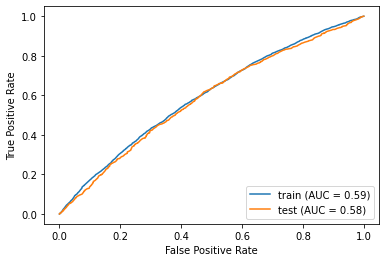

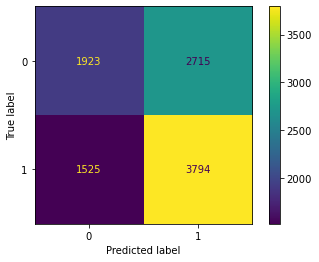

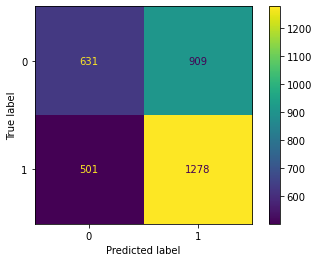

In [32]:
logreg(X_train_best_log,X_test_best_log,y_train,y_test)

Number of Neighbors: 17
Metric: manhattan
Weights: uniform
Mean Cross-Val Score: 0.5418303046439904
Train Mean Accuracy: 0.5968665260620669
Test Mean Accuracy: 0.5444410967158783
Recall Score: 0.641371557054525
Precision Score: 0.5662531017369727
F1 score: 0.6014760147601476


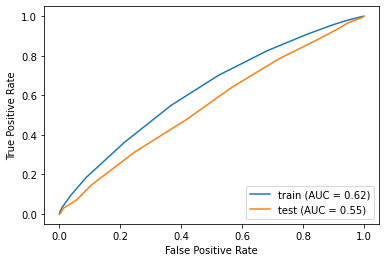

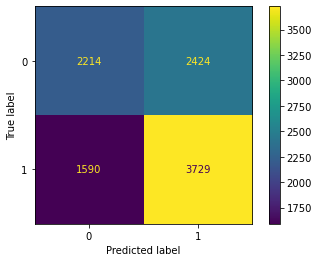

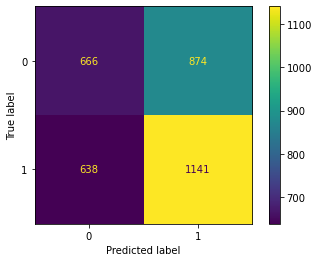

In [34]:
knn(X_train_scaled,X_test_scaled,y_train,y_test)

In [35]:
dfeats= feature_select(X_train,y_train,DecisionTreeClassifier,min_features=10)
X_train_best_tree = X_train[dfeats]
X_test_best_tree = X_test[dfeats]

Max Depth: 3
Min Sample Split: 2
criterion: gini
Mean Cross-Val Score: 0.5662364677191942
Train Mean Accuracy: 0.5693481972481671
Test Mean Accuracy: 0.5649291955408255
Recall Score: 0.5834738617200674
Precision Score: 0.5962090752441126
F1 score: 0.5897727272727272


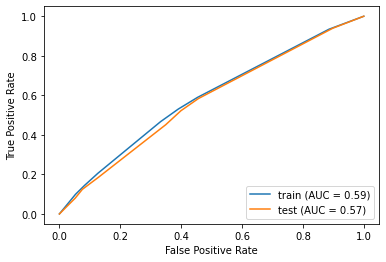

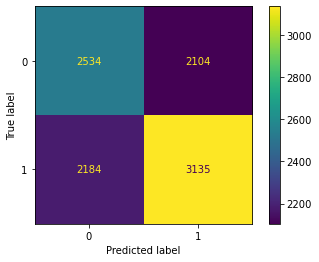

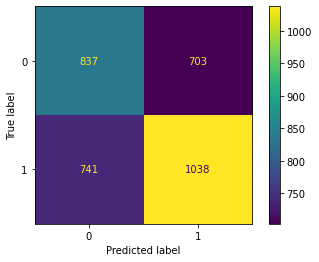

In [37]:
dtree(X_train_best_tree,X_test_best_tree,y_train,y_test)

In [38]:
rfeats= feature_select(X_train,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train[rfeats]
X_test_best_for = X_test[rfeats]

Number of Trees: 115
criterion: gini
Mean Cross-Val Score: 0.5360059524890118
Train Mean Accuracy: 0.6207693080245054
Test Mean Accuracy: 0.5474540524254293
Recall Score: 0.6554243957279371
Precision Score: 0.5673965936739659
F1 score: 0.608242044861763


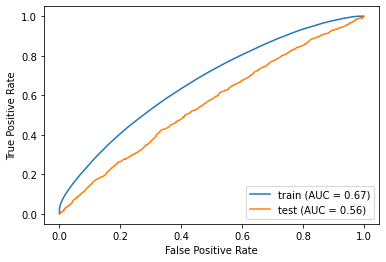

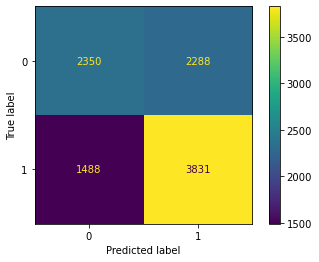

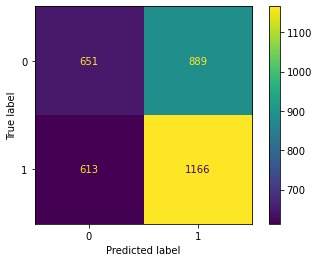

In [40]:
random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

Dec Tree Max Depth: 5
Dec Tree Criterion: gini
Bagging Max Samples: 5
Bag Max Features: 5
# of Base Estimators: 500
Mean Cross-Val Score: 0.5639268777773071
Train Mean Accuracy Score: 0.5486592347092498
Test Mean Accuracy Score: 0.5531786682735764
Recall Score: 0.93929173693086
Precision Score: 0.5485883125410375
F1 score: 0.6926424870466322


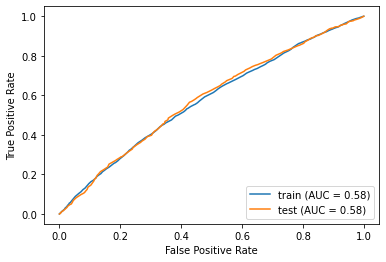

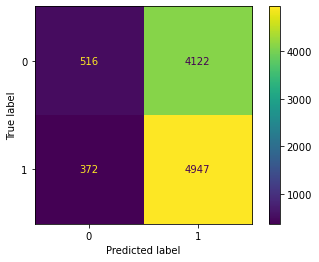

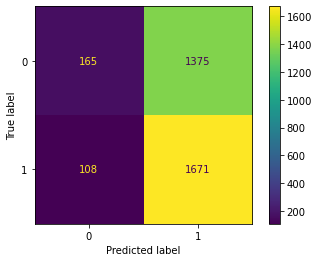

In [42]:
bagged(X_train_scaled,X_test_scaled,y_train,y_test)

In [43]:
xfeats= feature_select(X_train,y_train,XGBClassifier,min_features=10)
X_train_best_x = X_train[xfeats]
X_test_best_x = X_test[xfeats]

KeyboardInterrupt: 

In [ ]:
xgboost(X_train_best_x, X_test_best_x, y_train, y_test, cv=5)